## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [1]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

## Boston: continuous target

### step1: 讀進資料

In [10]:
boston = datasets.load_boston()
x = boston.data
y = boston.target

### step2:切分train/test set

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 77)

### step3: 建立模型，將資料 fit 進模型開始訓練

In [12]:
model = DTR()
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### step4: 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估

In [13]:
y_pred = model.predict(x_test)
mse = MSE(y_test,y_pred)
print("Mean_Sqaured_Error:%.4f"%mse)

Mean_Sqaured_Error:14.7419


In [14]:
print("Feature names:", boston.feature_names)

Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [15]:
print("Feature importance:", model.feature_importances_)

Feature importance: [1.73336724e-02 5.95243056e-05 3.27286989e-03 3.24504129e-04
 2.23725174e-02 2.19753714e-01 1.33365931e-02 9.90526318e-02
 3.77143897e-03 2.28825234e-02 8.27427116e-03 1.31273448e-02
 5.76438395e-01]


## wine : classification(3-class)

### step1: 讀進資料

In [17]:
wine = datasets.load_wine()
x = wine.data
y = wine.target

### step2:切分train/test set

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 77)

### step3: 建立模型，將資料 fit 進模型開始訓練

In [19]:
model = DTC()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### step4: 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估

In [20]:
y_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", acc)

Accuracy: 0.9166666666666666


In [21]:
print("Feature names:", wine.feature_names)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [22]:
print("Feature importance:", model.feature_importances_)

Feature importance: [0.         0.03446825 0.01030293 0.         0.04114305 0.01072346
 0.17782817 0.         0.         0.33309272 0.         0.
 0.39244142]


In [23]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

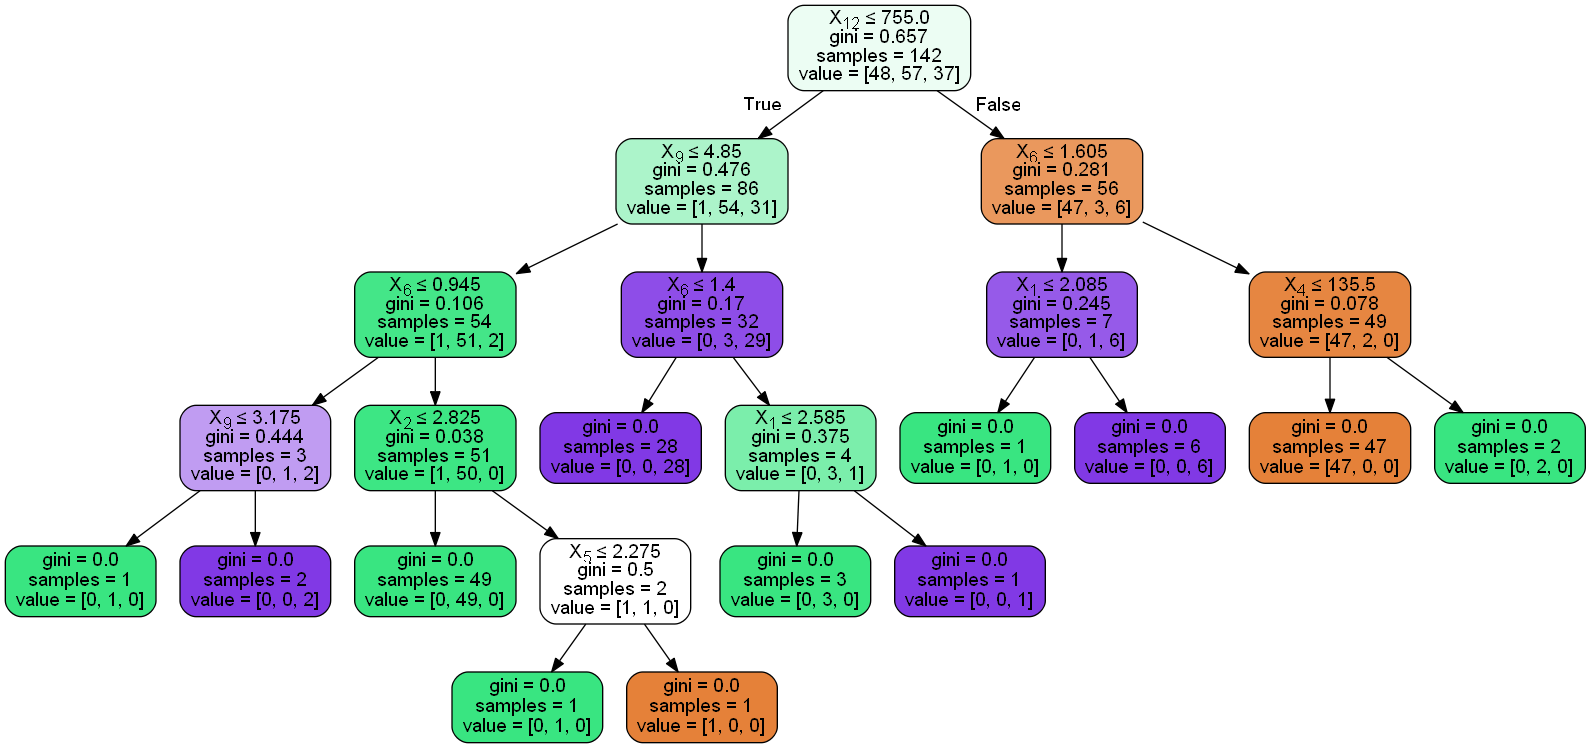

In [24]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 調整wine model變數

In [26]:
model = DTC(criterion = 'entropy', min_samples_split = 2, min_samples_leaf = 1)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
y_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", acc)

Accuracy: 0.9166666666666666


In [28]:
print("Feature importance:", model.feature_importances_)

Feature importance: [0.         0.         0.         0.         0.         0.
 0.40870805 0.         0.0300569  0.21203603 0.         0.
 0.34919901]


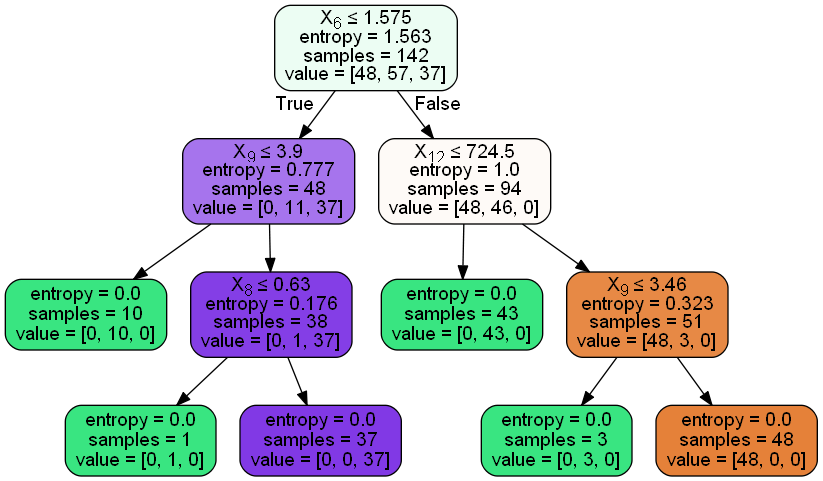

In [29]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())